In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_store_numba import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [5]:
sns.color_palette(cccpalette)

[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [6]:
import os
os.listdir()

['.ipynb_checkpoints',
 'calc_csat.py',
 'model_equations_separate_NC_store.py',
 'model_equations_separate_NC_store_numba.py',
 'Model_Parameters Store model.xlsx',
 'model_param_sensitivity_ponly.ipynb',
 'model_store_cc debug.ipynb',
 'model_store_cc.ipynb',
 'model_store_ponly.ipynb',
 'model_store_ponly_find_lsq_x0.ipynb',
 'reference_10cc.xlsx',
 'reference_10cc_axenic.xlsx',
 'reference_pro99_axenic.xlsx',
 'results_postprocess.py',
 'run_files',
 'run_least_squares_het.py',
 'run_least_squares_ponly.py',
 'run_monte.py',
 'run_shgo_ponly.py',
 'VPRO',
 '__pycache__']

In [7]:
refdf = pd.read_excel('reference_pro99_axenic.xlsx',)


In [8]:
    model = 'MIXOTROPH'
    json_l= []
    which_organism = 'ponly'
    pro99_mode = True
    refdf['ref_Bp'] = refdf['ref_Bp'].clip(lower=4)


    new_param_vals = get_param_vals_from_json_list(model, json_l)
    t_eval, t_end = get_t_eval_and_t_end(None, refdf, 140)
    (var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
        ) = get_constants_per_organism(pro99_mode, which_organism)

    # default - run simulation
    MSE_err, new_param_vals, df, mse_df,= run_solver_from_new_params(
        new_param_vals, refdf, 
         init_var_vals, 
        calc_dydt, prepare_params_tuple, t_end , t_eval, var_names, intermediate_names, return_dfs=True, max_step=100
    )

    print ('MSE:', MSE_err)


MSE: 12209234.14626879


In [9]:
par_tuple = prepare_params_tuple(new_param_vals)
print_intermediate0(calc_dydt, intermediate_names, init_var_vals, par_tuple)


gross_uptakeINp = 6.83e-05, 5.90e+00
gross_uptakeONp = 1.36e-05, 1.17e+00
gross_uptakeICp = 3.35e-04, 2.89e+01
gross_uptakeOCp = 6.68e-05, 5.77e+00
uptakeNp = 8.18e-05, 7.07e+00
uptakeCp = 4.01e-04, 3.47e+01
QCp = 7.00e+00, 6.05e+05
biosynthesisCp = 1.40e-08, 1.21e-03
respirationCp = 8.68e-06, 7.50e-01
biomass_breakdownCp = 0.00e+00, 0.00e+00


In [10]:
biomass_diff0_ponly(calc_dydt, var_names,init_var_vals, par_tuple)


Bp + Np + DON + RDON + DIN = 0.0
Bp + Cp + DOC + RDOC + DIC = -5.421010862427522e-20


In [11]:
mdf = df.melt(id_vars=['t', 'day'])

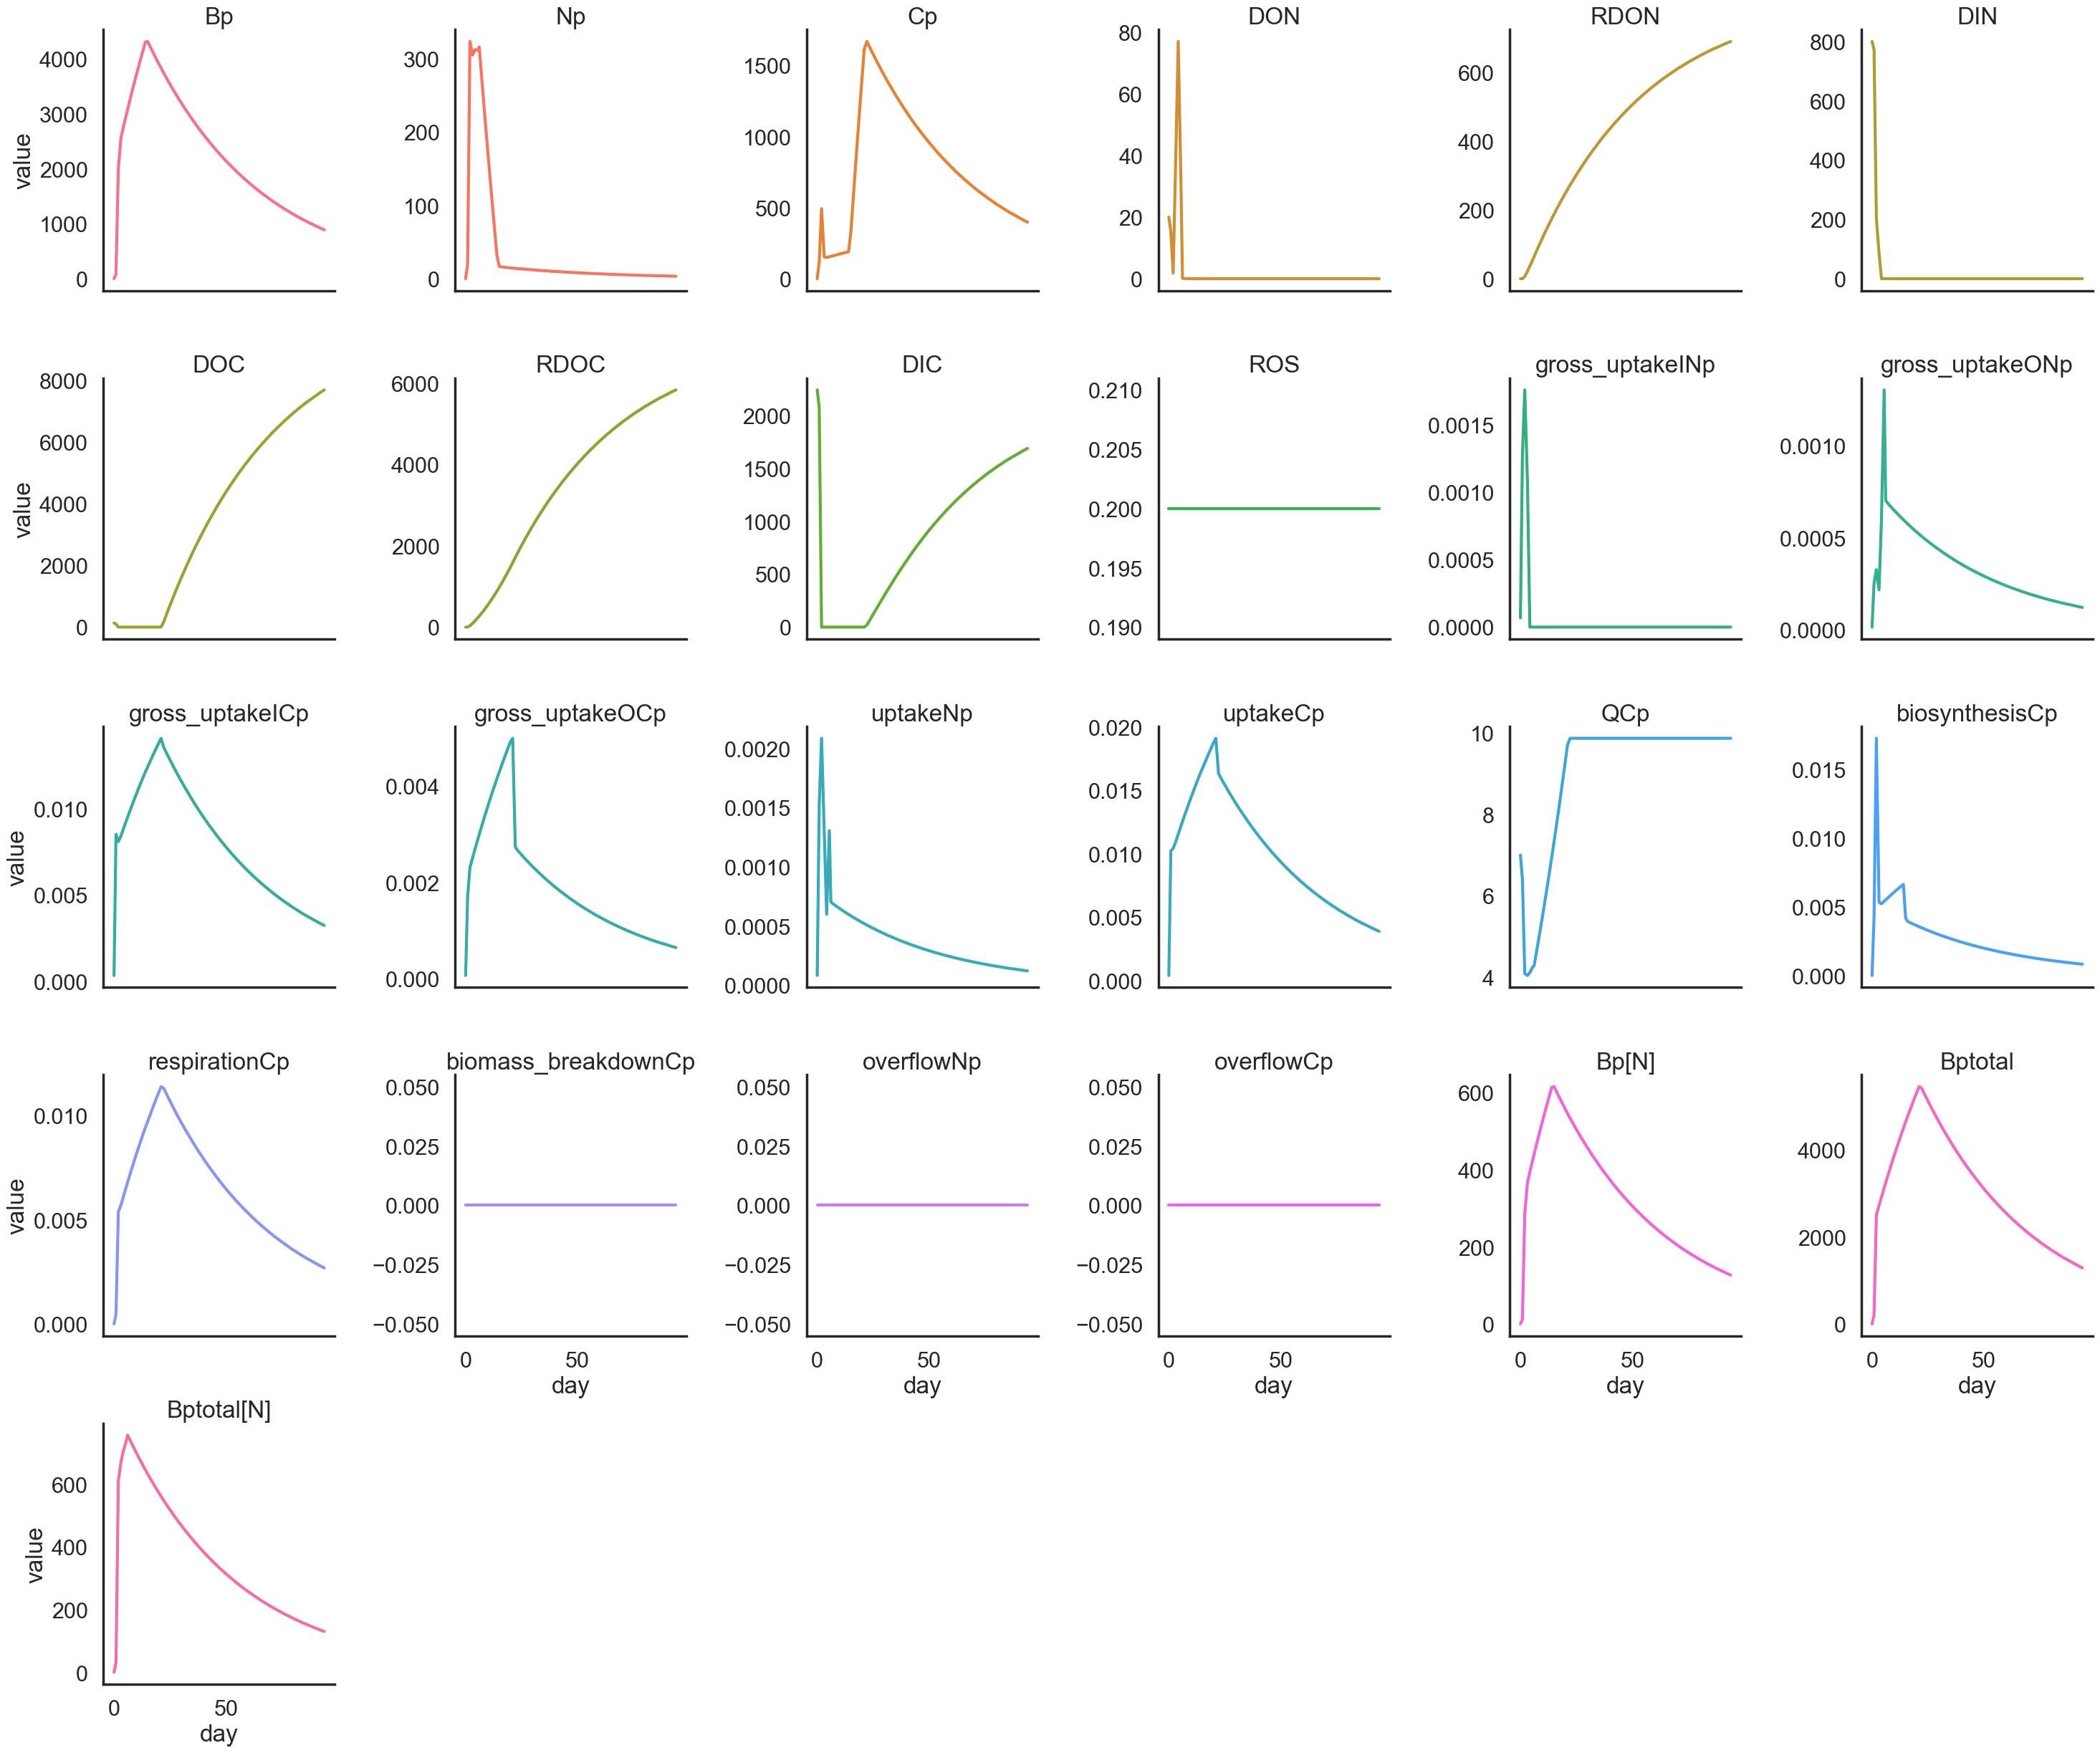

In [12]:
sns.relplot(data=mdf, #.loc[mdf.day < 3]
             x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()

In [13]:
compute_mse(df,refdf)

,Sample,full name,Group,compare_points,MSE
0,Pro99_axenicA,Axenic_PRO99,Axenic_PRO99,58.0,1.220923e+07
1,Pro99_axenicB,Axenic_PRO99,Axenic_PRO99,58.0,1.224845e+07
2,Pro99_axenicC,Axenic_PRO99,Axenic_PRO99,58.0,1.229928e+07


In [14]:
refdf.columns

Index(['Date', 'day', 'Sample', 'FL', 'Group', 'full name', 'predicted',
       'ref_Bp', 'id', 't'],
      dtype='object')

In [15]:
df.min()

Bp                     4.166667e+00
Np                     0.000000e+00
Cp                     0.000000e+00
DON                    4.394859e-03
RDON                   0.000000e+00
DIN                   -8.057257e-17
DOC                    4.532154e-03
RDOC                   0.000000e+00
DIC                    2.944717e-03
ROS                    2.000000e-01
t                      0.000000e+00
day                    0.000000e+00
gross_uptakeINp       -1.315549e-17
gross_uptakeONp        1.355806e-05
gross_uptakeICp        3.345220e-04
gross_uptakeOCp        6.683665e-05
uptakeNp               8.182001e-05
uptakeCp               4.013586e-04
QCp                    4.044816e+00
biosynthesisCp         1.404755e-08
respirationCp          8.680686e-06
biomass_breakdownCp    0.000000e+00
overflowNp             0.000000e+00
overflowCp             0.000000e+00
Bp[N]                  5.952381e-01
Bptotal                4.166667e+00
Bptotal[N]             5.952381e-01
dtype: float64

In [18]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(pnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pnpalette, hue_order=pnorder,
           ).set(ylabel='umol N/l')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(pcorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=pcpalette, hue_order=pcorder,
           ).set(ylabel='umol C/l')
sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')
#sns.scatterplot(data=refdf, x='day', y='Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR_light, marker='P')



<AxesSubplot:xlabel='day', ylabel='umol C/l'>

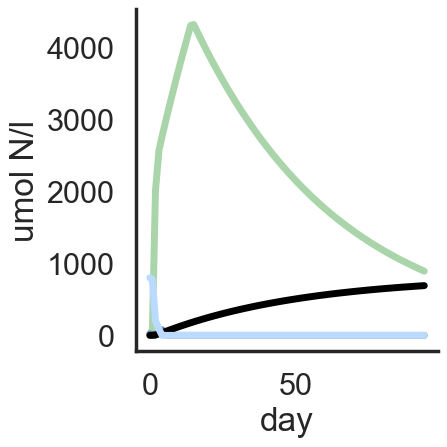

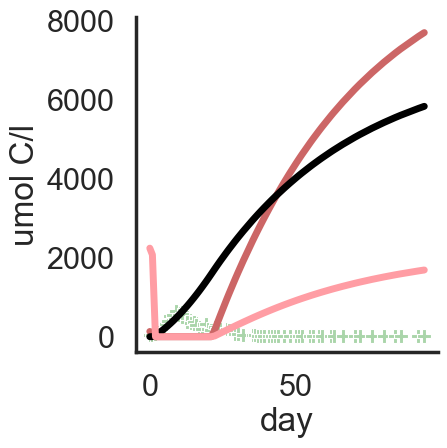

In [19]:
plt.show()